In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

dir_path = "/content/drive/My Drive/Big Data Research Paper/"

In [ ]:
# Load the SupplyChainDataset using ISO-8859-1 encoding
supply_chain = pd.read_csv(dir_path + 'SupplyChainDataset.csv', encoding='ISO-8859-1')
supply_chain.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
# Standardize column names for supply_chain dataset
supply_chain.columns = supply_chain.columns.str.upper().str.replace(' ', '_')
supply_chain.head()

,TYPE,DAYS_FOR_SHIPPING_(REAL),DAYS_FOR_SHIPMENT_(SCHEDULED),BENEFIT_PER_ORDER,SALES_PER_CUSTOMER,DELIVERY_STATUS,LATE_DELIVERY_RISK,CATEGORY_ID,CATEGORY_NAME,CUSTOMER_CITY,...,ORDER_ZIPCODE,PRODUCT_CARD_ID,PRODUCT_CATEGORY_ID,PRODUCT_DESCRIPTION,PRODUCT_IMAGE,PRODUCT_NAME,PRODUCT_PRICE,PRODUCT_STATUS,SHIPPING_DATE_(DATEORDERS),SHIPPING_MODE
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TYPE                           180519 non-null  object 
 1   DAYS_FOR_SHIPPING_(REAL)       180519 non-null  int64  
 2   DAYS_FOR_SHIPMENT_(SCHEDULED)  180519 non-null  int64  
 3   BENEFIT_PER_ORDER              180519 non-null  float64
 4   SALES_PER_CUSTOMER             180519 non-null  float64
 5   DELIVERY_STATUS                180519 non-null  object 
 6   LATE_DELIVERY_RISK             180519 non-null  int64  
 7   CATEGORY_ID                    180519 non-null  int64  
 8   CATEGORY_NAME                  180519 non-null  object 
 9   CUSTOMER_CITY                  180519 non-null  object 
 10  CUSTOMER_COUNTRY               180519 non-null  object 
 11  CUSTOMER_EMAIL                 180519 non-null  object 
 12  CUSTOMER_FNAME                

In [ ]:
# select columns to use
supply_chain = supply_chain[
    ['ORDER_DATE_(DATEORDERS)'
     , 'CATEGORY_NAME','CATEGORY_ID'
     ,'ORDER_ITEM_QUANTITY'
     ,'ORDER_REGION'
     ,'ORDER_STATUS'
     ,'PRODUCT_NAME','PRODUCT_CARD_ID'
     ,'DAYS_FOR_SHIPPING_(REAL)','DAYS_FOR_SHIPMENT_(SCHEDULED)'
     ,
    ]
]

In [ ]:
supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   ORDER_DATE_(DATEORDERS)        180519 non-null  object
 1   CATEGORY_NAME                  180519 non-null  object
 2   CATEGORY_ID                    180519 non-null  int64 
 3   ORDER_ITEM_QUANTITY            180519 non-null  int64 
 4   ORDER_REGION                   180519 non-null  object
 5   ORDER_STATUS                   180519 non-null  object
 6   PRODUCT_NAME                   180519 non-null  object
 7   PRODUCT_CARD_ID                180519 non-null  int64 
 8   DAYS_FOR_SHIPPING_(REAL)       180519 non-null  int64 
 9   DAYS_FOR_SHIPMENT_(SCHEDULED)  180519 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 13.8+ MB


In [ ]:
supply_chain.isna().sum()

,0
ORDER_DATE_(DATEORDERS),0
CATEGORY_NAME,0
CATEGORY_ID,0
ORDER_ITEM_QUANTITY,0
ORDER_REGION,0
ORDER_STATUS,0
PRODUCT_NAME,0
PRODUCT_CARD_ID,0
DAYS_FOR_SHIPPING_(REAL),0
DAYS_FOR_SHIPMENT_(SCHEDULED),0


In [ ]:
supply_chain['ORDER_DATE_(DATEORDERS)'] = pd.to_datetime(supply_chain['ORDER_DATE_(DATEORDERS)'])
supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   ORDER_DATE_(DATEORDERS)        180519 non-null  datetime64[ns]
 1   CATEGORY_NAME                  180519 non-null  object        
 2   CATEGORY_ID                    180519 non-null  int64         
 3   ORDER_ITEM_QUANTITY            180519 non-null  int64         
 4   ORDER_REGION                   180519 non-null  object        
 5   ORDER_STATUS                   180519 non-null  object        
 6   PRODUCT_NAME                   180519 non-null  object        
 7   PRODUCT_CARD_ID                180519 non-null  int64         
 8   DAYS_FOR_SHIPPING_(REAL)       180519 non-null  int64         
 9   DAYS_FOR_SHIPMENT_(SCHEDULED)  180519 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 13.8+ MB


In [ ]:
# Extracting year, month, day, and weekday from the order date
supply_chain['ORDER_YEAR'] = supply_chain['ORDER_DATE_(DATEORDERS)'].dt.year
supply_chain['ORDER_MONTH'] = supply_chain['ORDER_DATE_(DATEORDERS)'].dt.month
supply_chain['ORDER_DAY'] = supply_chain['ORDER_DATE_(DATEORDERS)'].dt.day
supply_chain['ORDER_WEEKDAY'] = supply_chain['ORDER_DATE_(DATEORDERS)'].dt.weekday
supply_chain['ORDER_DATE'] = supply_chain['ORDER_DATE_(DATEORDERS)'].dt.date
supply_chain.drop(columns='ORDER_DATE_(DATEORDERS)', inplace=True)
supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   CATEGORY_NAME                  180519 non-null  object
 1   CATEGORY_ID                    180519 non-null  int64 
 2   ORDER_ITEM_QUANTITY            180519 non-null  int64 
 3   ORDER_REGION                   180519 non-null  object
 4   ORDER_STATUS                   180519 non-null  object
 5   PRODUCT_NAME                   180519 non-null  object
 6   PRODUCT_CARD_ID                180519 non-null  int64 
 7   DAYS_FOR_SHIPPING_(REAL)       180519 non-null  int64 
 8   DAYS_FOR_SHIPMENT_(SCHEDULED)  180519 non-null  int64 
 9   ORDER_YEAR                     180519 non-null  int32 
 10  ORDER_MONTH                    180519 non-null  int32 
 11  ORDER_DAY                      180519 non-null  int32 
 12  ORDER_WEEKDAY                  180519 non-nu

<Figure size 1000x600 with 0 Axes>

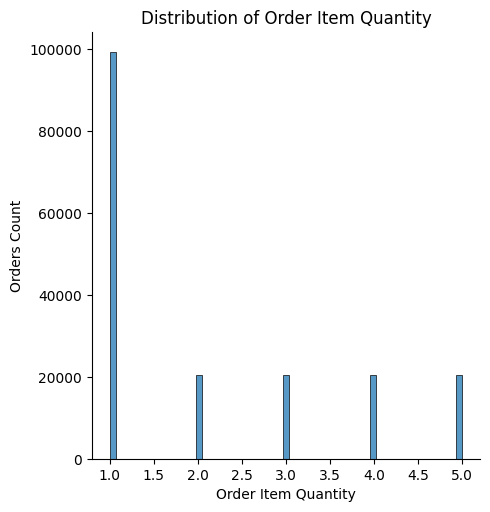

In [ ]:
# Distribution of ORDER_ITEM_QUANTITY
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
g = sns.displot(supply_chain['ORDER_ITEM_QUANTITY'])
g.set_axis_labels("Order Item Quantity", "Orders Count")  # Set x and y labels
plt.title('Distribution of Order Item Quantity')
plt.show()

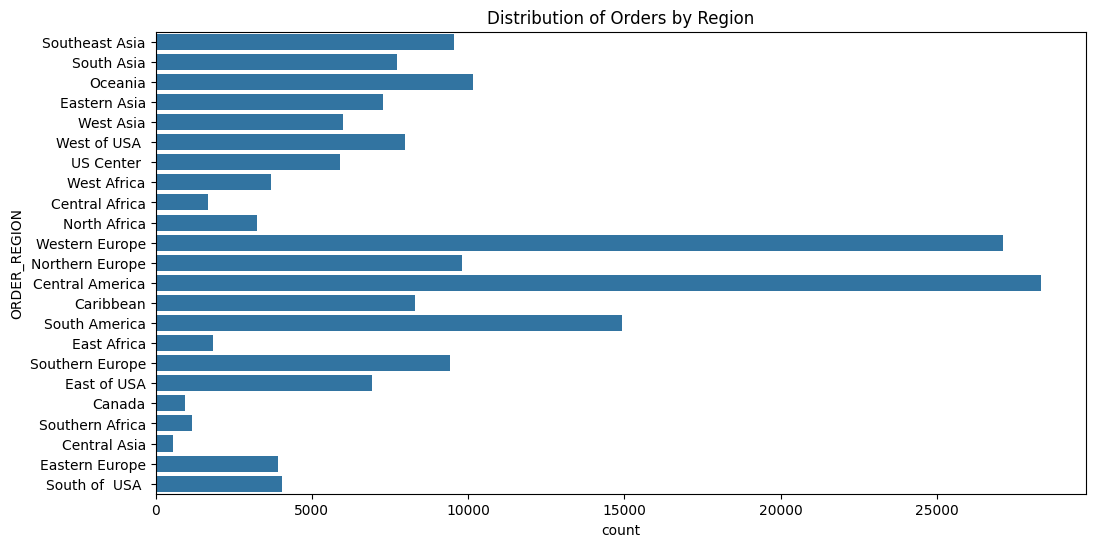

In [ ]:


# Distribution of orders by region
plt.figure(figsize=(12, 6))
sns.countplot(data=supply_chain, y='ORDER_REGION')
plt.title('Distribution of Orders by Region')
plt.show()

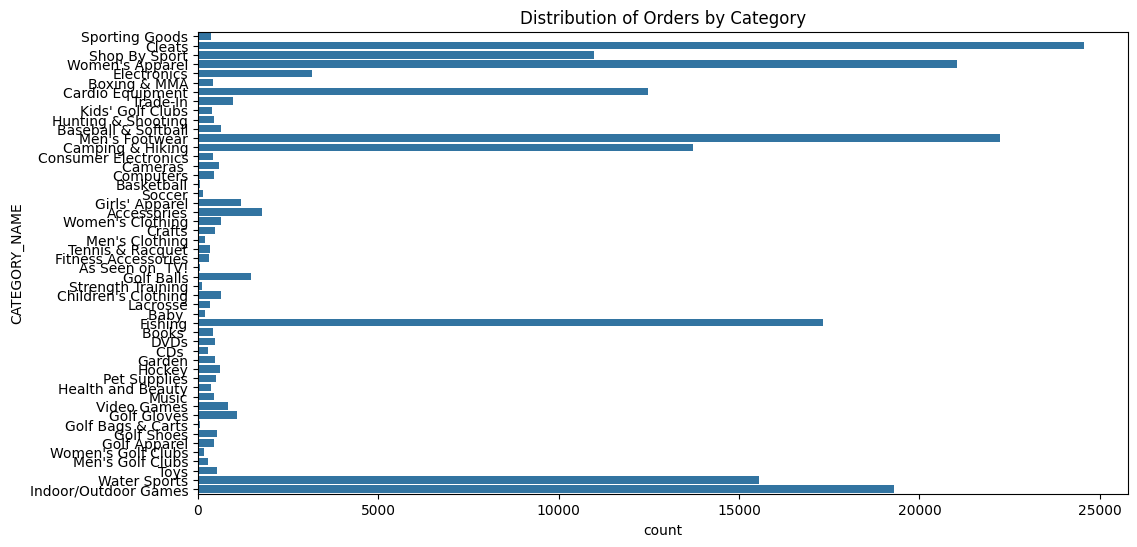

In [ ]:


# Distribution of orders by category
plt.figure(figsize=(12, 6))
sns.countplot(data=supply_chain, y='CATEGORY_NAME')
plt.title('Distribution of Orders by Category')
plt.show()

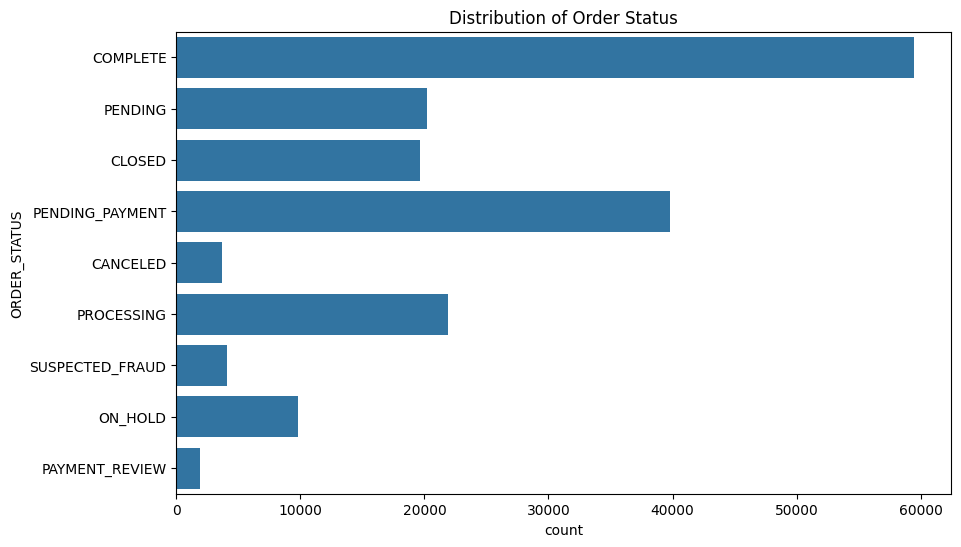

In [ ]:


# Distribution of order status
plt.figure(figsize=(10, 6))
sns.countplot(data=supply_chain, y='ORDER_STATUS')
plt.title('Distribution of Order Status')
plt.show()

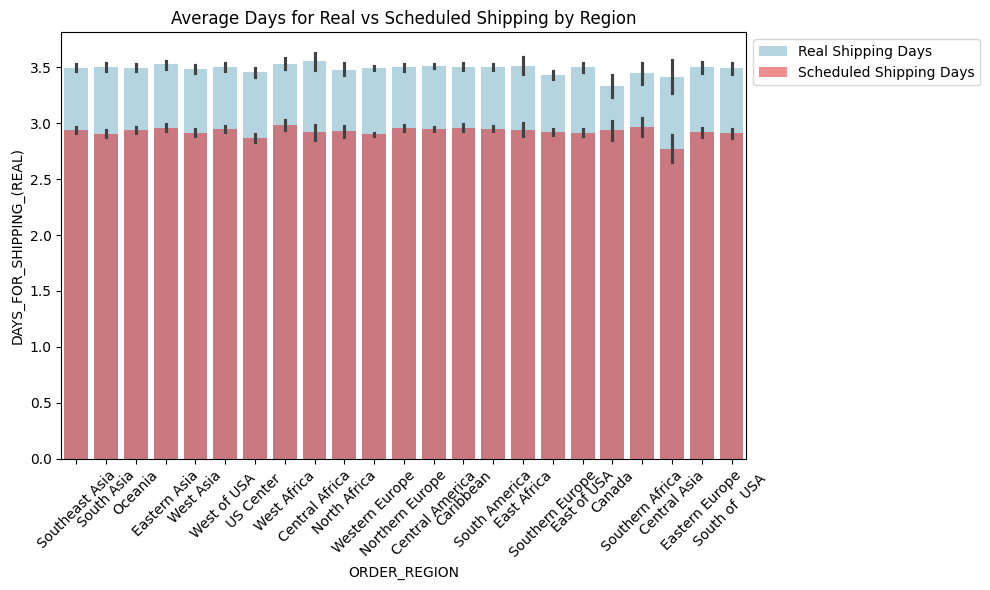

In [ ]:


# Average days for real shipping vs scheduled shipping
plt.figure(figsize=(10, 6))
sns.barplot(data=supply_chain, x='ORDER_REGION', y='DAYS_FOR_SHIPPING_(REAL)', color='lightblue', label='Real Shipping Days')
sns.barplot(data=supply_chain, x='ORDER_REGION', y='DAYS_FOR_SHIPMENT_(SCHEDULED)', color='red', alpha=0.5, label='Scheduled Shipping Days')
plt.title('Average Days for Real vs Scheduled Shipping by Region')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

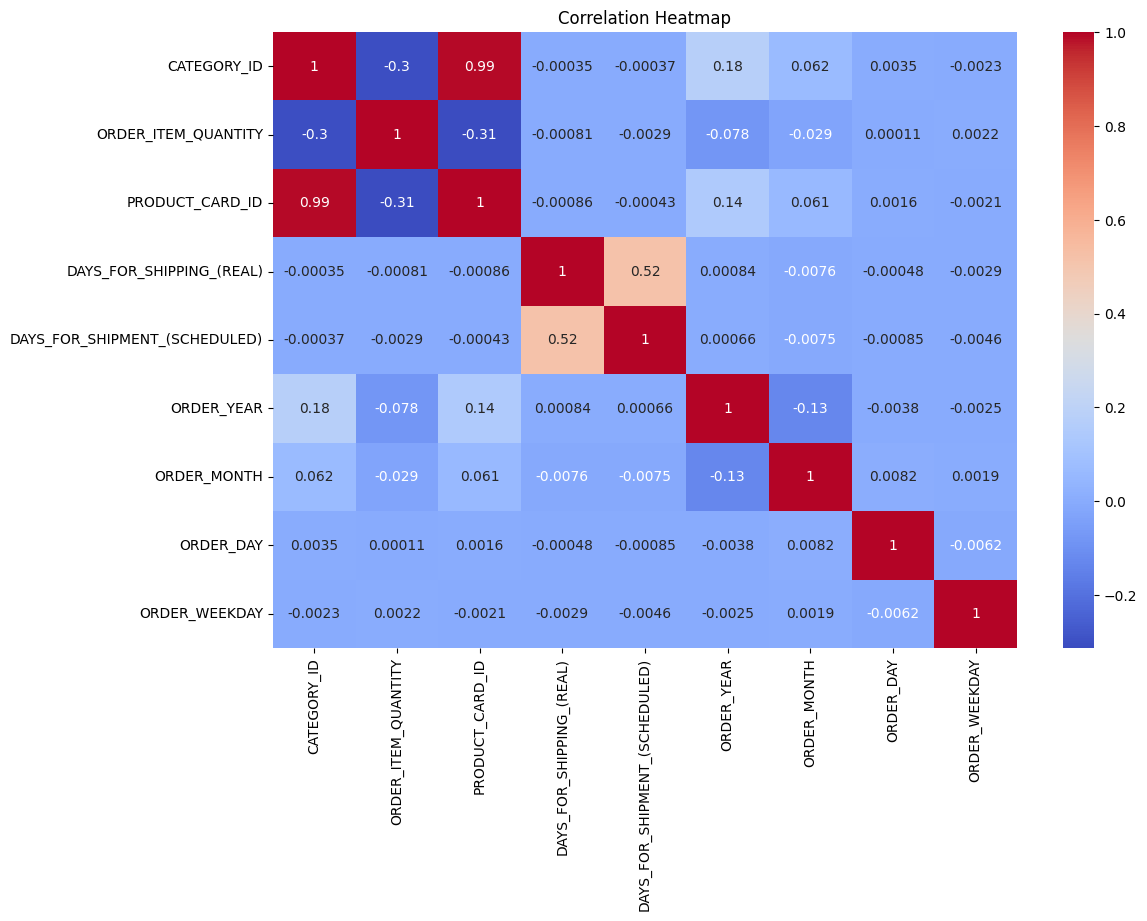

In [ ]:


# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(supply_chain.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Orders over time
plt.figure(figsize=(12, 8))
daily_orders = supply_chain.groupby(['ORDER_DATE'])['ORDER_ITEM_QUANTITY'].sum().reset_index()

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Orders over time - filter out last dates
plt.figure(figsize=(12, 8))
filtered_daily_orders = daily_orders.copy()

<Figure size 1200x800 with 0 Axes>

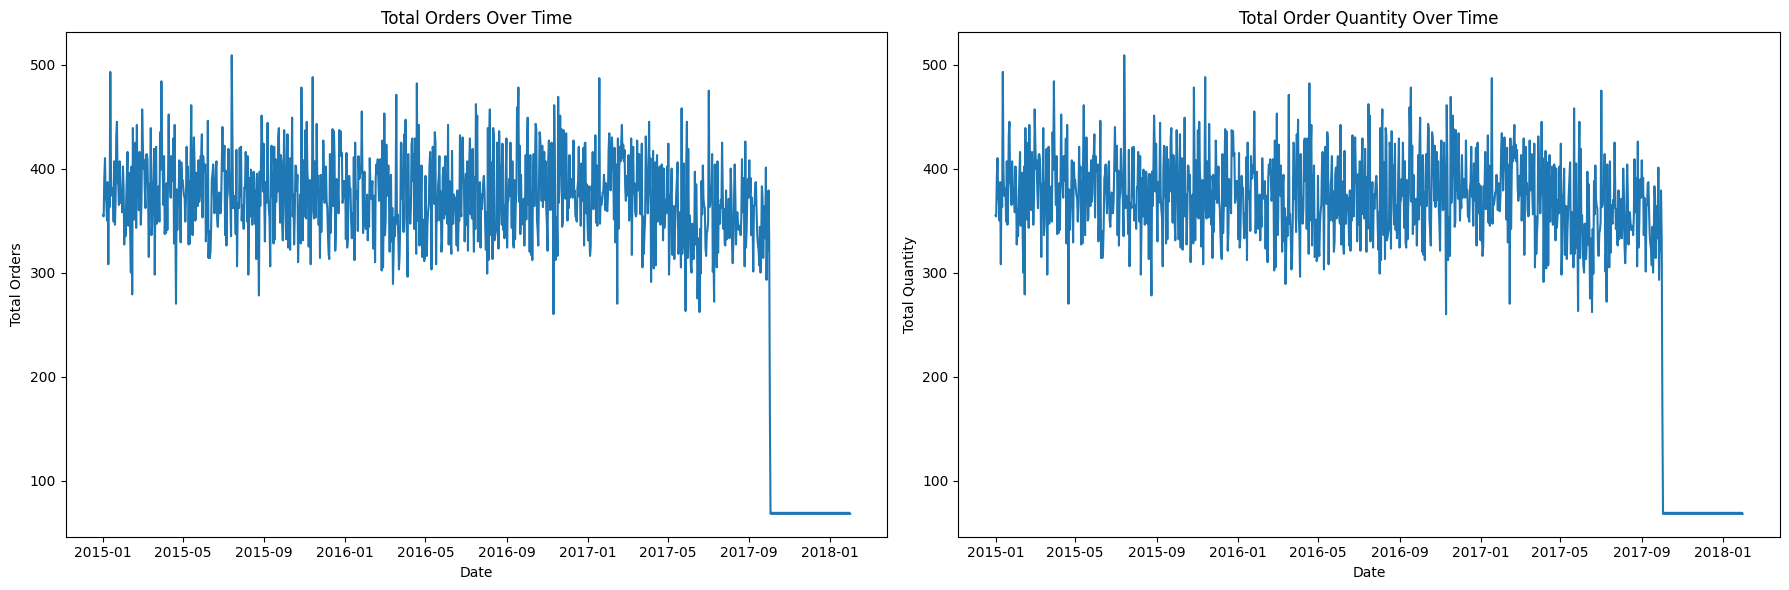

In [ ]:
import matplotlib.pyplot as plt

# Prepare data
daily_orders = supply_chain.groupby('ORDER_DATE')['ORDER_ITEM_QUANTITY'].sum().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# First plot (using pandas plot)
supply_chain.groupby('ORDER_DATE')['ORDER_ITEM_QUANTITY'].sum().plot(ax=axes[0])
axes[0].set_title('Total Orders Over Time')
axes[0].set_ylabel('Total Orders')
axes[0].set_xlabel('Date')

# Second plot (using seaborn lineplot)
sns.lineplot(data=daily_orders, x='ORDER_DATE', y='ORDER_ITEM_QUANTITY', ax=axes[1])
axes[1].set_title('Total Order Quantity Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Quantity')

# Adjust layout
plt.tight_layout()
plt.show()

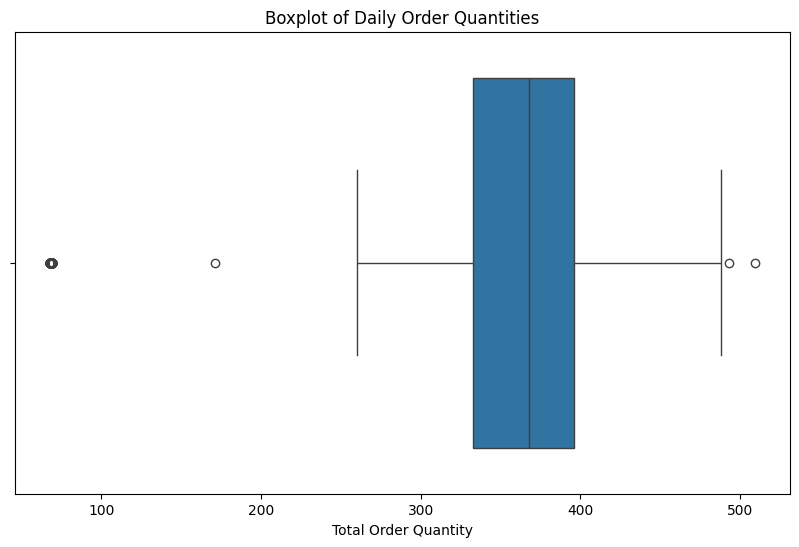

In [ ]:
# Boxplot for daily order quantities
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_daily_orders['ORDER_ITEM_QUANTITY'])
plt.title('Boxplot of Daily Order Quantities')
plt.xlabel('Total Order Quantity')
plt.show()

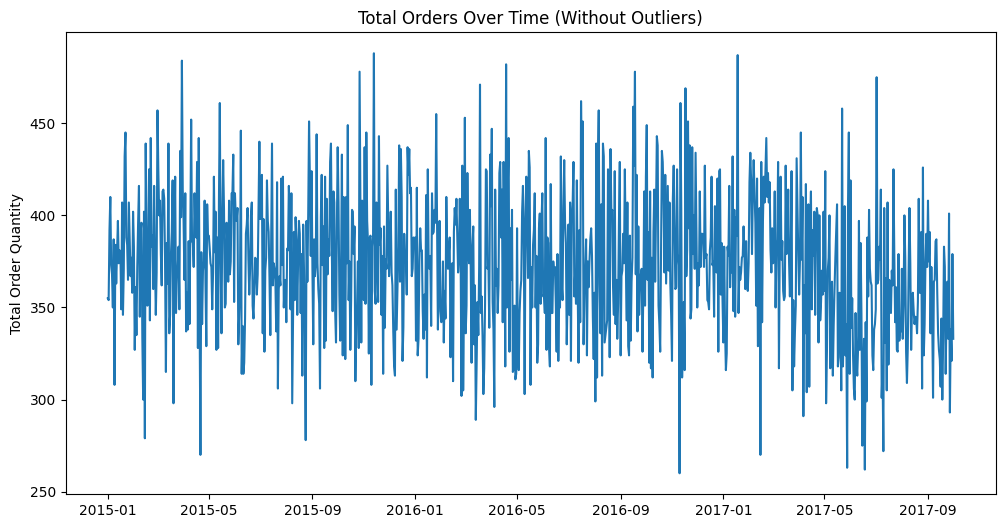

In [ ]:
# remove outliers
# Aggregate order quantities by date

# Calculate Q1, Q3, and IQR
Q1 = filtered_daily_orders['ORDER_ITEM_QUANTITY'].quantile(0.25)
Q3 = filtered_daily_orders['ORDER_ITEM_QUANTITY'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
cleaned_daily_orders = filtered_daily_orders[(filtered_daily_orders['ORDER_ITEM_QUANTITY'] >= lower_bound) &
                               (filtered_daily_orders['ORDER_ITEM_QUANTITY'] <= upper_bound)]

# Plotting the time series without outliers
plt.figure(figsize=(12, 6))
plt.plot(cleaned_daily_orders['ORDER_DATE'], cleaned_daily_orders['ORDER_ITEM_QUANTITY'])
plt.title('Total Orders Over Time (Without Outliers)')
plt.ylabel('Total Order Quantity')
plt.show()

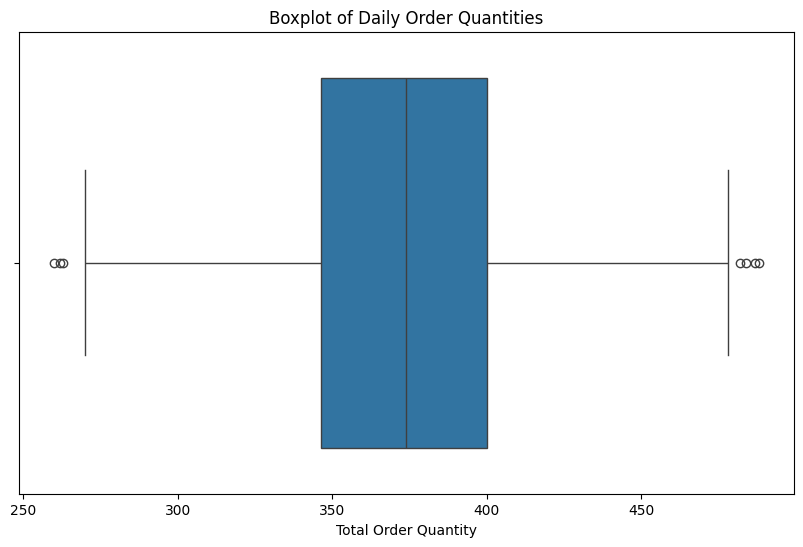

In [ ]:


# Boxplot for daily order quantities
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_daily_orders['ORDER_ITEM_QUANTITY'])
plt.title('Boxplot of Daily Order Quantities')
plt.xlabel('Total Order Quantity')
plt.show()

In [ ]:
# create monthly, weekly data
cleaned_daily_orders = cleaned_daily_orders.copy()
cleaned_daily_orders['ORDER_DATE'] = pd.to_datetime(cleaned_daily_orders['ORDER_DATE'])
cleaned_daily_orders['YEAR_MONTH']=cleaned_daily_orders['ORDER_DATE'].dt.to_period('M')
cleaned_daily_orders['YEAR_WEEK']=cleaned_daily_orders['ORDER_DATE'].dt.to_period('W')
cleaned_daily_orders

,ORDER_DATE,ORDER_ITEM_QUANTITY,YEAR_MONTH,YEAR_WEEK
0,2015-01-01,355,2015-01,2014-12-29/2015-01-04
1,2015-01-02,354,2015-01,2014-12-29/2015-01-04
2,2015-01-03,392,2015-01,2014-12-29/2015-01-04
3,2015-01-04,410,2015-01,2014-12-29/2015-01-04
4,2015-01-05,373,2015-01,2015-01-05/2015-01-11
...,...,...,...,...
1000,2017-09-27,293,2017-09,2017-09-25/2017-10-01
1001,2017-09-28,338,2017-09,2017-09-25/2017-10-01
1002,2017-09-29,321,2017-09,2017-09-25/2017-10-01
1003,2017-09-30,379,2017-09,2017-09-25/2017-10-01


In [ ]:
cleaned_daily_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1004
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ORDER_DATE           1003 non-null   datetime64[ns]
 1   ORDER_ITEM_QUANTITY  1003 non-null   int64         
 2   YEAR_MONTH           1003 non-null   period[M]     
 3   YEAR_WEEK            1003 non-null   period[W-SUN] 
dtypes: datetime64[ns](1), int64(1), period[M](1), period[W-SUN](1)
memory usage: 39.2 KB


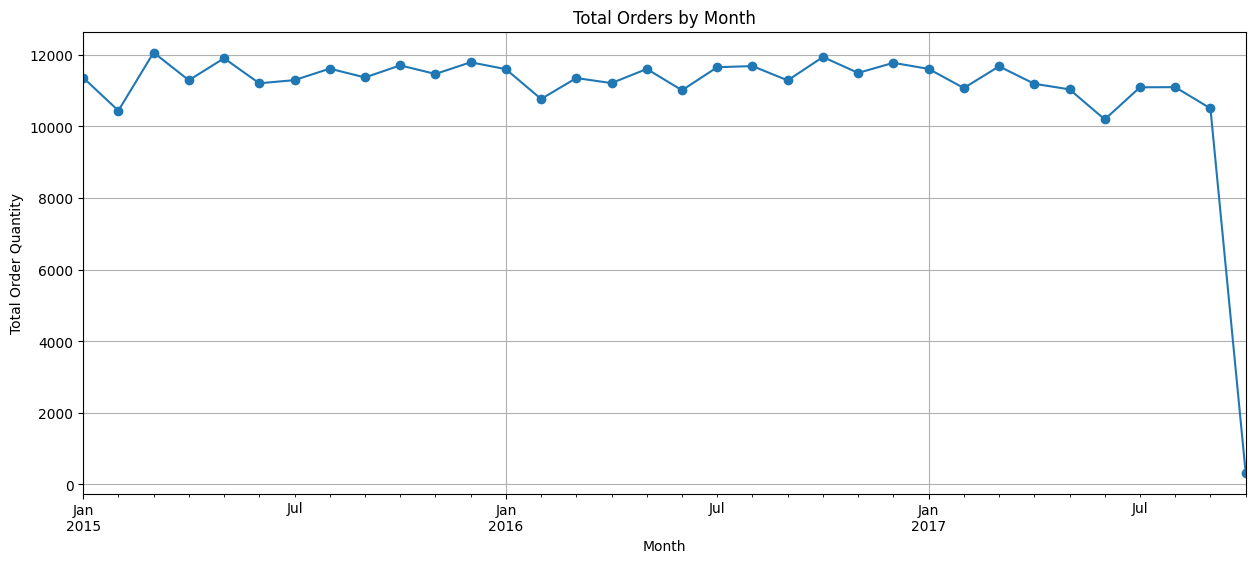

In [ ]:
# Group by 'year-month' and sum the ORDER_ITEM_QUANTITY
monthly_orders = cleaned_daily_orders.groupby('YEAR_MONTH')['ORDER_ITEM_QUANTITY'].sum()
weekly_orders = cleaned_daily_orders.groupby('YEAR_WEEK')['ORDER_ITEM_QUANTITY'].sum()

# Plot
plt.figure(figsize=(15, 6))
monthly_orders.plot(kind='line', marker='o')
plt.title('Total Orders by Month')
plt.ylabel('Total Order Quantity')
plt.xlabel('Month')
plt.grid(True)
plt.show()

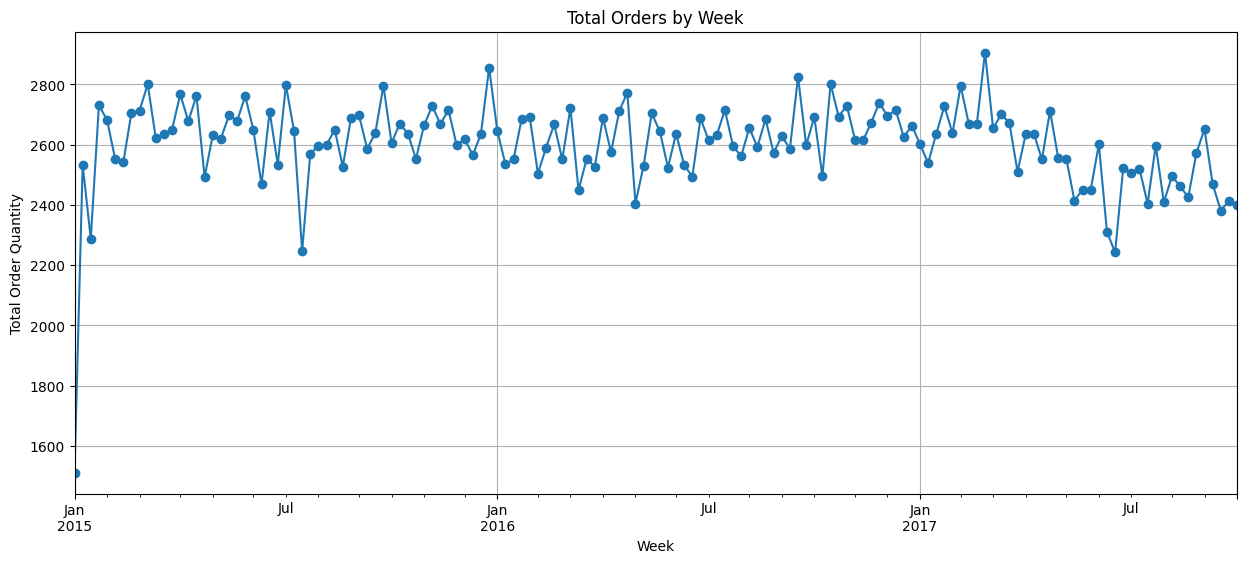

In [ ]:
# Plot
plt.figure(figsize=(15, 6))
weekly_orders.plot(kind='line', marker='o')
plt.title('Total Orders by Week')
plt.ylabel('Total Order Quantity')
plt.xlabel('Week')
plt.grid(True)
plt.show()

In [ ]:
weekly_orders.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 144 entries, 2014-12-29/2015-01-04 to 2017-09-25/2017-10-01
Freq: W-SUN
Series name: ORDER_ITEM_QUANTITY
Non-Null Count  Dtype
--------------  -----
144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


Demand Forecasting

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Convert the series to a DataFrame
weekly_orders_df = weekly_orders.reset_index()
weekly_orders_df.columns = ['ds', 'y']

# Convert the 'ds' column to datetime format
weekly_orders_df['ds'] = weekly_orders_df['ds'].dt.to_timestamp()

# Split the data (holding out the last 20% for testing)
split_point = int(len(weekly_orders_df) * 0.80)
train = weekly_orders_df.iloc[:split_point]
test = weekly_orders_df.iloc[split_point:]

# Initialize and fit the Prophet model
weekly_model = Prophet()
weekly_model.fit(train)

# Create future dates for prediction (entire duration: train + test)
weekly_future = weekly_model.make_future_dataframe(periods=len(test), freq='W-SUN')

# Predict
weekly_forecast = weekly_model.predict(weekly_future)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3p0i_3a0/xt77axo8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3p0i_3a0/ut8hmy1n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12984', 'data', 'file=/tmp/tmp3p0i_3a0/xt77axo8.json', 'init=/tmp/tmp3p0i_3a0/ut8hmy1n.json', 'output', 'file=/tmp/tmp3p0i_3a0/prophet_modelhowxjghi/prophet_model-20250411155506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:55:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:55:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Evaluate on Training data
y_pred_train = weekly_forecast['yhat'][:split_point]
mae_train = mean_absolute_error(train['y'], y_pred_train)
mse_train = mean_squared_error(train['y'], y_pred_train)
rmse_train = np.sqrt(mse_train)

print(f"Training MAE: {mae_train}")
print(f"Training MSE: {mse_train}")
print(f"Training RMSE: {rmse_train}")

# Evaluate on Testing data
y_pred_test = weekly_forecast['yhat'][split_point:]
mae_test = mean_absolute_error(test['y'], y_pred_test)
mse_test = mean_squared_error(test['y'], y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"\nTesting MAE: {mae_test}")
print(f"Testing MSE: {mse_test}")
print(f"Testing RMSE: {rmse_test}")


Training MAE: 80.91498435500249
Training MSE: 15123.84649509512
Training RMSE: 122.97904900874425

Testing MAE: 176.43129560082463
Testing MSE: 43016.18534737345
Testing RMSE: 207.40343619953228


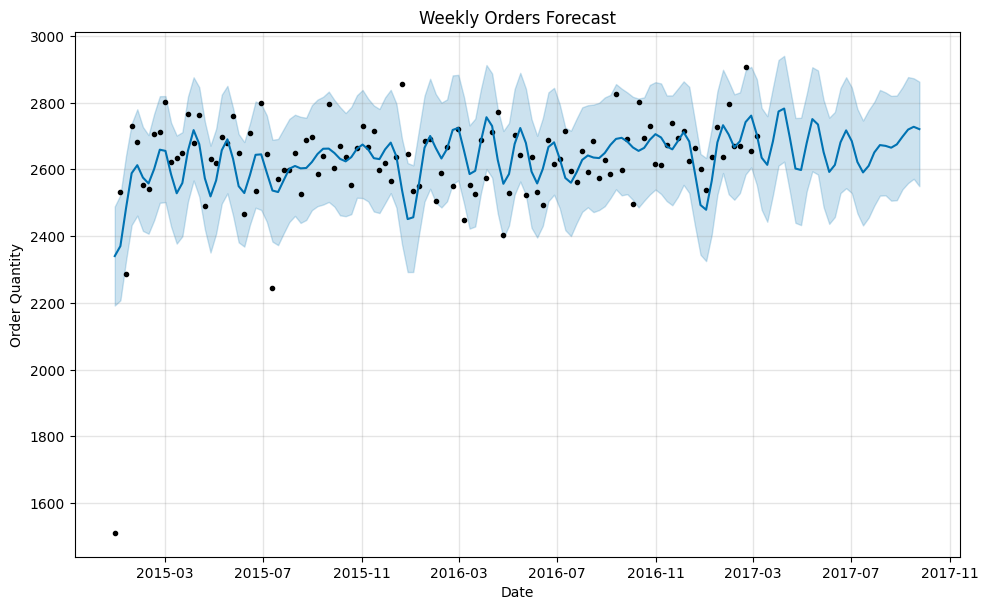

In [ ]:

# Plot the forecast
weekly_fig1 = weekly_model.plot(weekly_forecast)
plt.title('Weekly Orders Forecast')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.show()



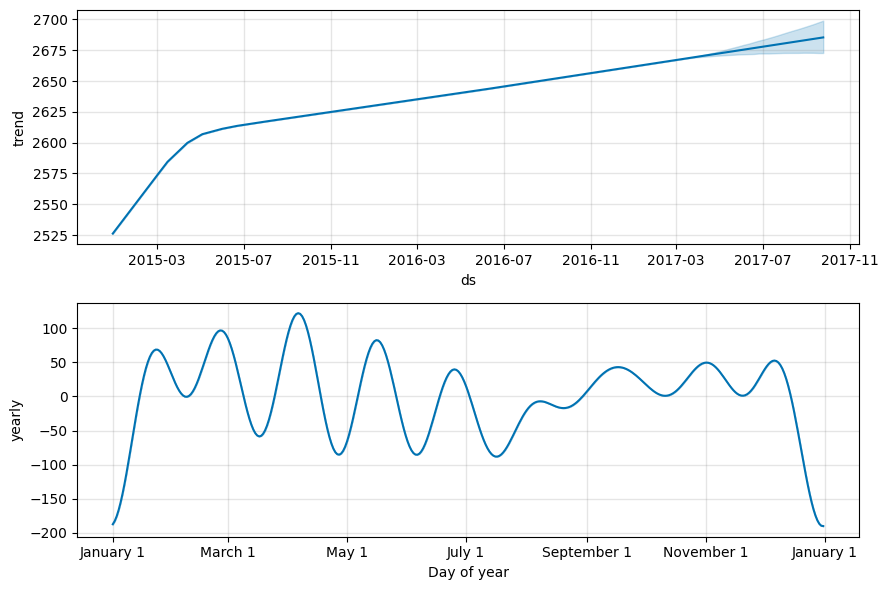

In [ ]:
# Components of the forecast (trend, yearly seasonality, etc.)
weekly_fig2 = weekly_model.plot_components(weekly_forecast)

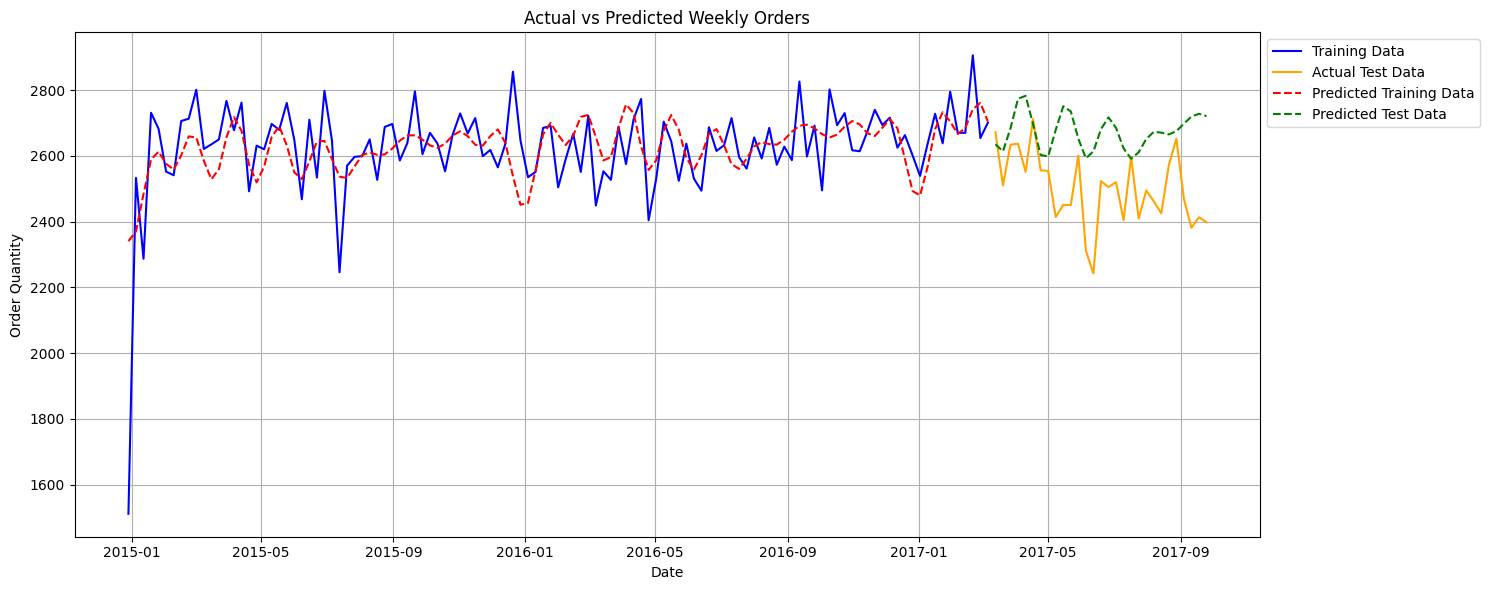

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(train['ds'], train['y'], label='Training Data', color='blue')
plt.plot(test['ds'], test['y'], label='Actual Test Data', color='orange')
plt.plot(train['ds'], y_pred_train, label='Predicted Training Data', color='red', linestyle='--')
plt.plot(test['ds'], y_pred_test, label='Predicted Test Data', color='green', linestyle='--')
plt.title('Actual vs Predicted Weekly Orders')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
weekly_orders_df.describe()

,ds,y
count,144,144.000000
mean,2016-05-12 12:00:00,2601.513889
min,2014-12-29 00:00:00,1511.000000
25%,2015-09-05 06:00:00,2538.000000
50%,2016-05-12 12:00:00,2626.500000
75%,2017-01-17 18:00:00,2687.250000
max,2017-09-25 00:00:00,2906.000000
std,NaN,147.965881


Inventory Management

In [ ]:
import matplotlib.pyplot as plt

# Merge 'y' values from train and test into weekly_forecast
weekly_forecast = weekly_forecast.merge(train[['ds', 'y']], on='ds', how='left')
weekly_forecast = weekly_forecast.merge(test[['ds', 'y']], on='ds', how='left', suffixes=('', '_test'))
weekly_forecast['y'].fillna(weekly_forecast['y_test'], inplace=True)
weekly_forecast.drop(columns='y_test', inplace=True)

# Calculate weekly standard deviation of actual demand
weekly_forecast['std_dev'] = weekly_forecast['y'].rolling(window=7).std()

# Calculate weekly safety stock
weekly_forecast['safety_stock'] = 1.65 * weekly_forecast['std_dev'] * np.sqrt(1)

# Calculate weekly average demand from actual data
weekly_forecast['avg_weekly_demand'] = weekly_forecast['y'].rolling(window=7).mean()

# Calculate weekly reorder point
weekly_forecast['reorder_point'] = (weekly_forecast['avg_weekly_demand'] * 1) + weekly_forecast['safety_stock']



<ipython-input-36-33bb9fe12233>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weekly_forecast['y'].fillna(weekly_forecast['y_test'], inplace=True)


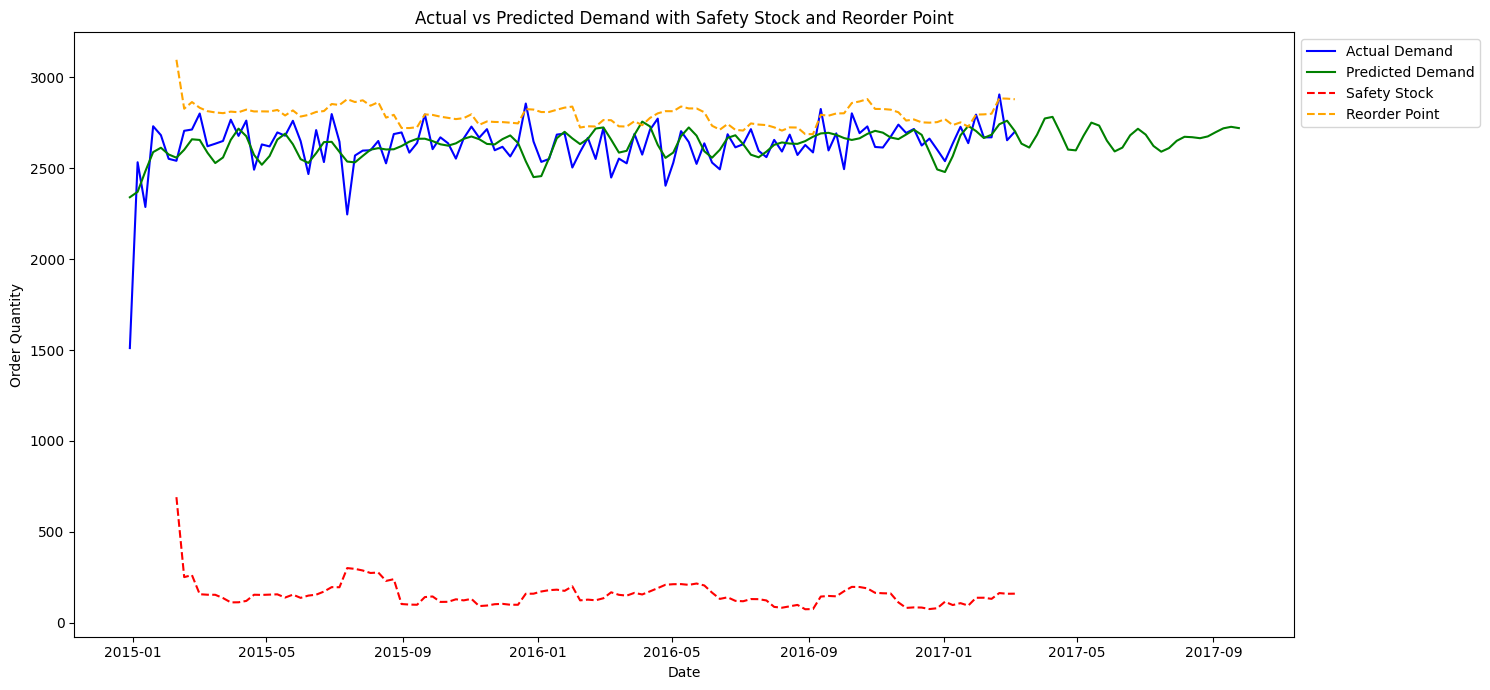

In [ ]:
# Plotting
plt.figure(figsize=(15, 7))
plt.plot(weekly_forecast['ds'], weekly_forecast['y'], label='Actual Demand', color='blue')
plt.plot(weekly_forecast['ds'], weekly_forecast['yhat'], label='Predicted Demand', color='green')
plt.plot(weekly_forecast['ds'], weekly_forecast['safety_stock'], label='Safety Stock', color='red', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['reorder_point'], label='Reorder Point', color='orange', linestyle='--')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Actual vs Predicted Demand with Safety Stock and Reorder Point')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.tight_layout()
plt.show()

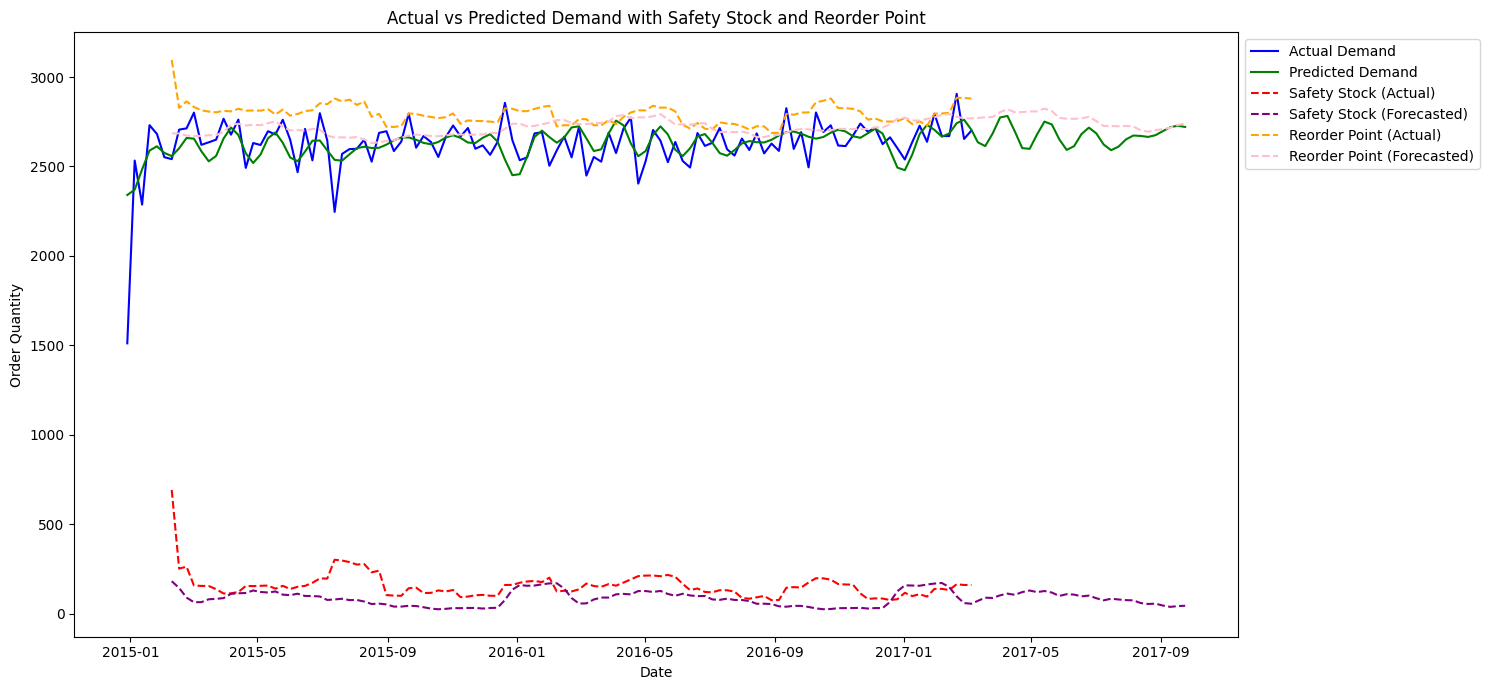

In [ ]:

# Calculate weekly standard deviation of forecasted demand
weekly_forecast['forecasted_std_dev'] = weekly_forecast['yhat'].rolling(window=7).std()

# Calculate weekly safety stock for forecasted demand
weekly_forecast['forecasted_safety_stock'] = 1.65 * weekly_forecast['forecasted_std_dev'] * np.sqrt(1)

# Calculate weekly average demand from forecasted data
weekly_forecast['forecasted_avg_weekly_demand'] = weekly_forecast['yhat'].rolling(window=7).mean()

# Calculate weekly reorder point for forecasted demand
weekly_forecast['forecasted_reorder_point'] = (weekly_forecast['forecasted_avg_weekly_demand'] * 1) + weekly_forecast['forecasted_safety_stock']

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(weekly_forecast['ds'], weekly_forecast['y'], label='Actual Demand', color='blue')
plt.plot(weekly_forecast['ds'], weekly_forecast['yhat'], label='Predicted Demand', color='green')
plt.plot(weekly_forecast['ds'], weekly_forecast['safety_stock'], label='Safety Stock (Actual)', color='red', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['forecasted_safety_stock'], label='Safety Stock (Forecasted)', color='purple', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['reorder_point'], label='Reorder Point (Actual)', color='orange', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['forecasted_reorder_point'], label='Reorder Point (Forecasted)', color='pink', linestyle='--')


# plt.legend()
# plt.title('Actual vs Predicted Demand with Safety Stock and Reorder Point')
# plt.xlabel('Date')
# plt.ylabel('Order Quantity')
# plt.show()

# Place legend outside upper right
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.title('Actual vs Predicted Demand with Safety Stock and Reorder Point')
plt.xlabel('Date')
plt.ylabel('Order Quantity')

# Adjust layout to prevent clipping
plt.tight_layout()

plt.show()

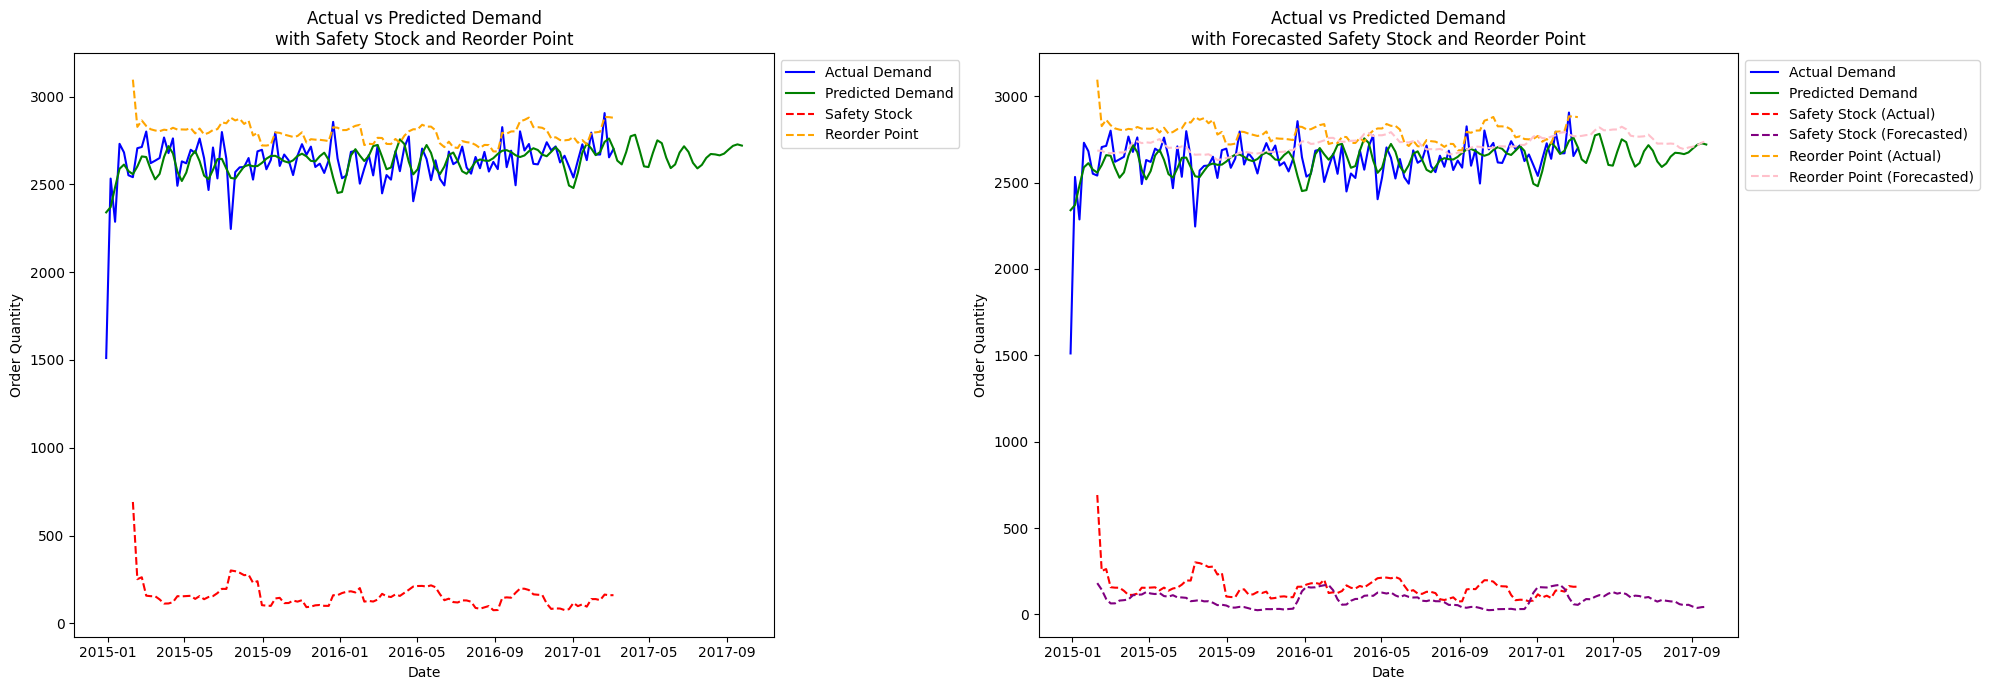

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 7))  # 1 row, 2 columns

# First plot: Actual vs Predicted Demand with Safety Stock and Reorder Point
axes[0].plot(weekly_forecast['ds'], weekly_forecast['y'], label='Actual Demand', color='blue')
axes[0].plot(weekly_forecast['ds'], weekly_forecast['yhat'], label='Predicted Demand', color='green')
axes[0].plot(weekly_forecast['ds'], weekly_forecast['safety_stock'], label='Safety Stock', color='red', linestyle='--')
axes[0].plot(weekly_forecast['ds'], weekly_forecast['reorder_point'], label='Reorder Point', color='orange', linestyle='--')

axes[0].set_title('Actual vs Predicted Demand\nwith Safety Stock and Reorder Point')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Order Quantity')
axes[0].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Second plot: With Forecasted Safety Stock and Reorder Point
axes[1].plot(weekly_forecast['ds'], weekly_forecast['y'], label='Actual Demand', color='blue')
axes[1].plot(weekly_forecast['ds'], weekly_forecast['yhat'], label='Predicted Demand', color='green')
axes[1].plot(weekly_forecast['ds'], weekly_forecast['safety_stock'], label='Safety Stock (Actual)', color='red', linestyle='--')
axes[1].plot(weekly_forecast['ds'], weekly_forecast['forecasted_safety_stock'], label='Safety Stock (Forecasted)', color='purple', linestyle='--')
axes[1].plot(weekly_forecast['ds'], weekly_forecast['reorder_point'], label='Reorder Point (Actual)', color='orange', linestyle='--')
axes[1].plot(weekly_forecast['ds'], weekly_forecast['forecasted_reorder_point'], label='Reorder Point (Forecasted)', color='pink', linestyle='--')

axes[1].set_title('Actual vs Predicted Demand\nwith Forecasted Safety Stock and Reorder Point')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Order Quantity')
axes[1].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Adjust layout
plt.tight_layout()

plt.show()